# MODEL STUDY

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import axes3d

In [17]:
import build as bd

In [18]:
data = bd.load_data("output.csv")

In [30]:
def same(song1, song2):
    #returns true if two songs are the same track
    if (song1['title'] == song2['title']) and (song1['artist_name'] == song2['artist_name']):
        return True
    else: return False

# CLUSTER PLOT CODE

In [31]:
k = 3 #number of clusters

#distance would be our defined distance function

def dtos(song, playlist): #distance to other songs (sum of distances to all songs in the playlist
    return np.sum([bd.distance(othersong, song) for othersong in playlist])
    
def find_starting_points(playlist, k):
    all_distances = np.array([dtos(song, playlist) for song in playlist])
    sort_indices = np.argsort(all_distances)
    starting_points = sort_indices[:k]
    return starting_points

def cluster_songs(starting_points, k, pl, song):
    #cluster songs in input playlist into k clusters with respective starting points in starting_points wrt distance to song
    # where song is a recommended song
    # pl is playlist
    names = [[pl[start]['title']] for start in starting_points]
    values = [[bd.distance(pl[start], song)] for start in starting_points]

    start_ids = [(pl[s]['title'],pl[s]['artist_name']) for s in starting_points]
    for plsong in pl:
        if (plsong['title'], plsong['artist_name']) not in start_ids:
            cluster = np.argsort(np.array([bd.distance(plsong, pl[start]) for start in starting_points]))[0]
            #returns index in starting_points which cluster it corresponds to
            names[cluster].append(plsong['title'])
            values[cluster].append(bd.distance(plsong, song))

    min = np.min([bd.distance(song, other) for other in pl])

    rescaled = values
    for i in range(len(values)):
        for j in range(len(values[i])):
            
            rescaled[i][j] = values[i][j] + np.abs(min) + 1
            
    return names, rescaled
    

In [21]:
def cluster_plot(distance_array, songs, size=(7,6)):

    size_of_points = 7

    k = len(distance_array)
    l = len(songs)

    if k != l or [len(kk) for kk in distance_array] != [len(ll) for ll in songs]:
        print("error with the input arrays")
        return 
              
    if k > 4 :
        print("too many clusters")
        return 
         
    x_min, x_max, y_min, y_max = -1, 1, -1, 1
    
    if k>=1:
        
        first = np.array(distance_array[0])
        x_max = np.max(first) + 1
        
    if k>=2:
        
        second = -np.array(distance_array[1])
        x_min = min(second) - 1 
        
    if k>=3:
        
        third = np.array(distance_array[2])
        y_max = np.max(third) + 1  
        
    if k>=4:
        
        fourth = -np.array(distance_array[3])
        y_min = np.min(fourth) - 1
        
    fig = plt.figure(figsize=size)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.plot(np.linspace(x_min, x_max, 100), np.zeros(100), color = 'k')
    
    if k >=3 :
        plt.plot(np.zeros(100), np.linspace(y_min, y_max, 100), color = "k")
        
    plt.plot([x_min - 2, 0, x_max + 2], [y_min - 2, 0, y_max + 2], color = 'r', marker='o', markersize = size_of_points, linestyle="")

    
    if k >= 1 :
        zeros = np.zeros(len(first))

        plt.plot(first, zeros, color='m', marker='o', markersize = size_of_points, linestyle="")
        for i in range(len(first)):
            plt.text(first[i], -0.5, str(i+1), ha='center', va='top', color='m')
        
    if k >= 2 :
        zeros = np.zeros(len(second))

        plt.plot(second, zeros, color='c', marker="o", markersize = size_of_points, linestyle="")
        for i in range(len(second)):
            plt.text(second[i], -0.5, str(i+1), ha='center', va='top', color='c')
    
    if k >= 3 :
        zeros = np.zeros(len(third))

        plt.plot(zeros, third, color='y', marker="o", markersize = size_of_points, linestyle="")
        for i in range(len(third)):
            plt.text(0.2, third[i], str(i+1), ha='center', va='top', color='y')
            
    if k == 4 :
        zeros = np.zeros(len(fourth))

        plt.plot(zeros, fourth, color='g', marker="o", markersize = size_of_points, linestyle="")
        for i in range(len(fourth)):
            plt.text(0.2, fourth[i], str(i+1), ha='center', va='top', color='g')

    plt.show()

    colors = ['\nMagenta', 'Cyan', 'Yellow', 'Green']
    for j in range(k):
        print(colors[j]+":\n")
        for i in range(len(songs[j])):
            print("\t"+str(i+1)+": "+songs[j][i]+" \n")


            

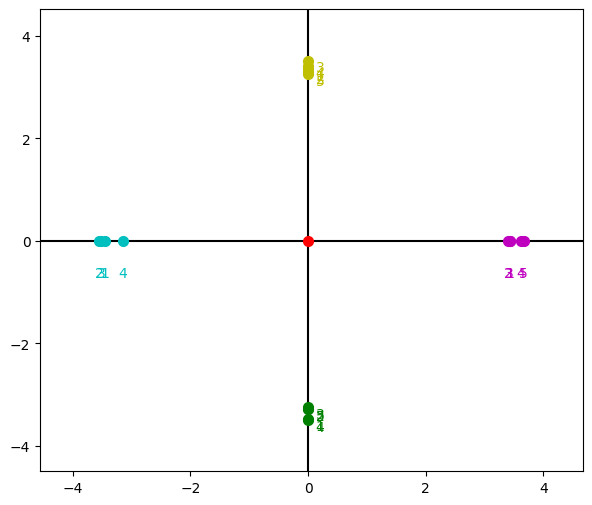


Magenta:

	1: Floating 

	2: The Urgency (LP Version) 

	3: Auguri Cha Cha 

	4: Tonight Will Be Alright 

	5: Caught In A Dream 

Cyan:

	1: Something Girls 

	2: Face the Ashes 

	3: Drop of Rain 

	4: Pink World 

Yellow:

	1: Soul Deep 

	2: Amor De Cabaret 

	3: The Moon And I (Ordinary Day Album Version) 

	4: Young Boy Blues 

	5: High Tide 

Green:

	1: Insatiable (Instrumental Version) 

	2: I Didn't Mean To 

	3: Keepin It Real (Skit) 

	4: La Culpa 

	5: Sohna Nee Sohna Data 



In [22]:
playlist = [data.iloc[i] for i in range(19)]
songrec = data.iloc[20]
#def cluster_songs(starting_points, k, pl, song)print(terms1, weights1, term2, weights2)
k = 4

alphas = [1,1,1,1,1]

#def find_starting_points(playlist, k):

#def cluster_plot(distance_array, songs, size=(7,6)):

names, values = cluster_songs(find_starting_points(playlist,k), k, playlist, songrec)
cluster_plot(values, names)


# CLOSEST N SONGS IN DISTANCE

In [23]:
def closest_n(song, pl, n):
    #song is a recommended song
    #pl playlist from which song was recommended
    #returns closest n songs in an array, closest to furthest

    distances = np.array([bd.distance(song, plsong) for plsong in pl])
    sort_distances = np.argsort(distances)
    n_indices = sort_distances[:n]
    return [playlist[i]['title'] for i in n_indices]

print(closest_n(songrec, playlist, 3))
    

['Pink World', 'Keepin It Real (Skit)', 'High Tide']


# Cool bar graph with different components

In [28]:
def bar_graph_data(songrec, pl, alphas = [1,1,1,1,1]):
    hottness = [bd.distance(songrec, song, alphas, 'hottness') for song in pl]
    loudness = [bd.distance(songrec, song, alphas, 'loudness') for song in pl]
    tempo = [bd.distance(songrec, song, alphas, 'tempo') for song in pl]
    similar_artists = [bd.distance(songrec, song, alphas, 'similar') for song in pl]
    shared_terms = [bd.distance(songrec, song, alphas, 'terms') for song in pl]

    return hottness, loudness, tempo, similar_artists, shared_terms

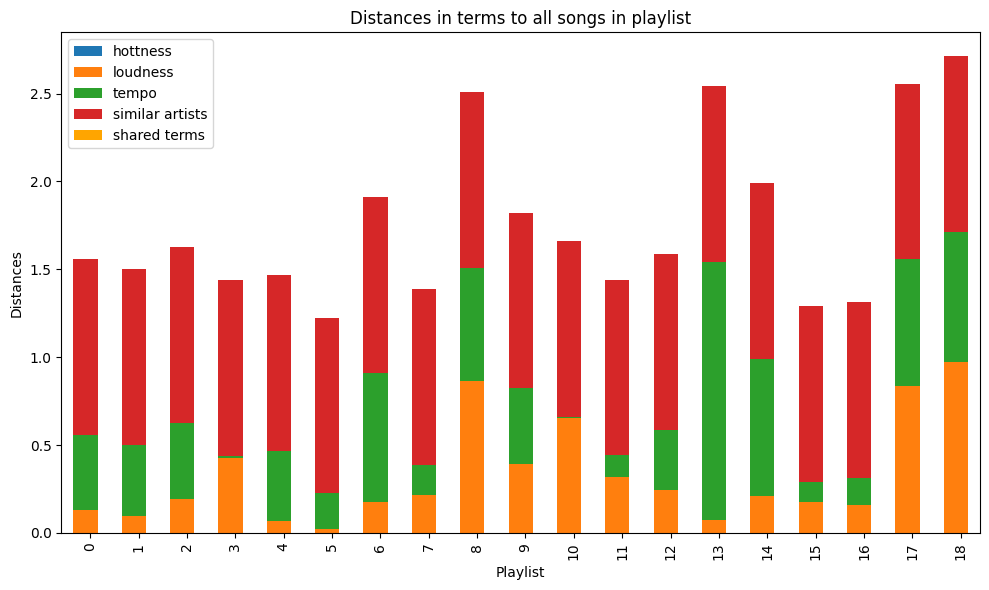

In [29]:

#DATA

# define songrec
# define playlist

playlist = [data.iloc[i] for i in range(20,40)]
songrec = data.iloc[19]
#def cluster_songs(starting_points, k, pl, song)print(terms1, weights1, term2, weights2)

alphas = [4,4,4,1,4]

hottness, loudness, tempo, similar_artists, shared_terms = bar_graph_data(songrec, playlist, alphas)
names = [song['title'] for song in playlist]

plotdata = {
    'Playlist songs' : [i for i in range(len(playlist)-1)],
    'hottness' : hottness[1:],
    'loudness' : loudness[1:],
    'tempo' : tempo[1:],
    'similar artists' : similar_artists[1:],
    'shared terms' : shared_terms[1:] #side bar plot
}


df = pd.DataFrame(plotdata)

# Set 'Year' as the index
df.set_index('Playlist songs', inplace=True)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the main stacked bars
df[['hottness', 'loudness', 'tempo', 'similar artists']].plot(kind='bar', stacked=True, ax=ax)

# Manually add the separate bar next to each group
bar_width = 0.2
x = np.arange(len(df.index))  # the label locations
separate_bar_x = x + bar_width  # position for the separate bar

ax.bar(separate_bar_x, df['shared terms'], width=bar_width, label='shared terms', color='orange')

# Adding labels and title
ax.set_xlabel('Playlist')
ax.set_ylabel('Distances')
ax.set_title('Distances in terms to all songs in playlist')

# Setting x-ticks to be in the middle of the main and separate bars
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(df.index)

# Adding a legend
ax.legend()

# Adjust layout to make room for the separate bars
plt.tight_layout()

# Show plot
plt.show()
    